<a href="https://colab.research.google.com/github/theWellHopeErr/Cynological-Analyser/blob/master/Load_Models_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Loading and Prediction**

##Import Statements

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  !pip install -U "tensorflow-gpu==2.0.0rc0" 
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import urllib.request


##Dataset Download

In [0]:
(train_examples, validation_examples), info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True,
)


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete8Q0ZB9/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete8Q0ZB9/stanford_dogs-test.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [0]:
classes = np.array(info.features['label'].names)
for i in classes:
  print("\"" + i[10:] + "\"",end = ", ")

"chihuahua", "japanese_spaniel", "maltese_dog", "pekinese", "shih-tzu", "blenheim_spaniel", "papillon", "toy_terrier", "rhodesian_ridgeback", "afghan_hound", "basset", "beagle", "bloodhound", "bluetick", "black-and-tan_coonhound", "walker_hound", "english_foxhound", "redbone", "borzoi", "irish_wolfhound", "italian_greyhound", "whippet", "ibizan_hound", "norwegian_elkhound", "otterhound", "saluki", "scottish_deerhound", "weimaraner", "staffordshire_bullterrier", "american_staffordshire_terrier", "bedlington_terrier", "border_terrier", "kerry_blue_terrier", "irish_terrier", "norfolk_terrier", "norwich_terrier", "yorkshire_terrier", "wire-haired_fox_terrier", "lakeland_terrier", "sealyham_terrier", "airedale", "cairn", "australian_terrier", "dandie_dinmont", "boston_bull", "miniature_schnauzer", "giant_schnauzer", "standard_schnauzer", "scotch_terrier", "tibetan_terrier", "silky_terrier", "soft-coated_wheaten_terrier", "west_highland_white_terrier", "lhasa", "flat-coated_retriever", "curl

In [0]:
def format_image(image, label = 121):
  # `hub` image modules exepct their data normalized to the [0,1] range.
  image = tf.image.resize(image, (224, 224))/255.0
  return  image, label
  
num_examples = info.splits['train'].num_examples

BATCH_SIZE = 32
IMAGE_RES = 224

train_batches      = train_examples.cache().shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

##Image Selection

In [0]:
# https://dogtime.com/dog-breeds/japanese-spitz#/slide/1

# chihuahua T
# url = 'https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/chihuahua-card-small.jpg?bust=1535568982'
# japanese_spaniel T
# url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExMVFRUXGBgYGBgYFxUWFxUXFxcXFxgXFhUZHSggGBolHRcYITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OGxAQGi0fICUrLS0tLS0tLS0tLS0tLS0tKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tKy0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAAEAAIDBQYBB//EAD4QAAEDAgMFBgQEBQQCAwEAAAEAAhEDIQQSMQUiQVFhE3GBkaHwBjKxwSNCUtEUYnKC4QeSorIz8SRj8hX/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAApEQACAgICAgECBgMAAAAAAAAAAQIRAyESMUFREwRhInGhscHwQoHR/9oADAMBAAIRAxEAPwDDbTpgFD03qXEEuMlQQuHTJJhLCpS6FHQbKlqMTKKZkiE1U6m8rgoIunRhFqKHpIa2ouOxMLuJbCAqFVjTQyC34ooWrXUbioKj06SGHveosy4CnhiJh9Koim1ihmMRDGIUYTqhRGGrQVAaSQpkJaAXlLGWXHVQVWUXItiNGsPoUwistkBRqKftlNoDO1RIVbiMLKsWuTXhTS2BFN/CJr8IrXIo6jFSwlKaCGrNVxUpFCVcOUbMU72KJzAj6lAymGmiCgHs1LTbClc1JoWZqCKdOyZWo9EbhaUhSVqNlPo1FG5qlohTuopNprSFJAkmpJKMWxpKB1FHBqRpqPKiQLQZCLDUm01OGI8jJkGRdFREdko34dHlY1kNS6Eq01ZNoFR1KCeM6CnRT1GIV7FdOwiacCrrIh1Iq6VFEtoqxw2y3P0LR/U5rZ7pSrYJ9NxY9pa4agouYeQCGQpaaMFMcl1tG+iMWMtkIYuOpo0MUFVMEHa0BENcomsTjZEBMwyjaGGLkZ8LbNbXeA7MO4feQvWdnbCwzGiKbXHmQtwsVvweO1MK9urSPBRwve24SkRlyNjlAVFtP4DwtSS0GkT+nT/abQklj9G2ePhdyr0dn+nLA69aQJ/LB6J9X/T+lFqrp62Hv33T+KRrPMixMNEFara/wdiKUlje1bzb+2qzLw5phzS08iIKVprs1gVbBoOphFdtK4+lKCk0EzNXCGUqOEKvatBcp0gjzBZBhsOp6mHsjKbE8tQ5DFDVwygfQWgq0UHUw6VyFZRGmkrY4RdR5CWFsZldBXMUYKixNQmqT1XMRJUIpuOyZJTciQ5BUwnlxWoASHqdoQlISiCCErDYWymn/wAOEJSrwjG4hK20NYz+GCs9lbEpPvVqZROgEknlp9JQFOpJga8l6H8N7FysmoIJF+n8ojgujBFzZgCl8JYJ4hj3tdzLjfwIHogNufB1TsQCQezMNeI/8ZvBi4gz0Er0fCUmNENaAPfEog0wdQu5440Mong2K2NUpA52QQ6B3cHdxUVPZlUiRTdrExA750jqvbqmyKZblLQ4CYkaDg3uCDxmzCdIbb9IPlKVY6Gto8br4FwbmgkaSBuz/UdfBVVQFegfE2zBMmo57h+qfQn6BZJ2DU5ZFF0bmVEFOpMLnZR9gPElWD8LCP2Xgm0/xXXI0B0B6Dn14JoT5PRnM1vw21uHpABozHWL+ZOqtm7bAdlDjPcI8YWLdtF0EzHqUH8P7SaK57Qm/Tj1VJySpCxt7PZdnVJEnVGuqrN7JxzC3ddKOdiRzThTD61SBKrhtBpdl4ofFbQAbEhYwbTc3FtjQn6qOSVFcavR6EKngqr4l+GGYphMZag0cIk9CY0V3gyCLjhcImmIt5JltAkjwLGYGpReabxBBSY0r2b4o+HKeLp3htQDdfy6O5tXk+O2XXw7stRhHUbzT1BCjkg0SeiurU0ISQrGoEFWF1EFnW1lx2KUDkLXlGrDYecUmmuqk1EhXWcDWXGdJVzcSkk4sBaimCUhRuuuflMcQpGum6WyXIe6iFC+gpaczdHMp2UeUr2GwGjQKIFAonKnAI8g0BfwymZhudkWwIihTBN9E0E5SSA1Ra/DWAaIqFoHInX1Ws/jLhg14+OgWSp7QuBwHDoFYbJqzLzxJHdzPlK9mEFFUgRZtMM+3vxKMaVU4F8x3WVmBa6VnREkzKI1AeKpcdtWHENknpJTMLiXu4Ed5j6Sp8rKcfZ34jwD6jIYb+niIusFtTYNejvPpmDbMLiTppovUaLTxUhAgjUHgYI8kmTAsnZKSR5lgfharUAe7KxmsuN/IfdVHxC3s3CkDprw7yeq9K2vigxpIgR7C8g2nXL3lxuSSfBPDFHGtCeQatjA0H34Dqq/C7aazecREwTIkeevchtr1LtaLk3A+nvopsD8MGsaVOSJeHOdyEHN6adYU2uTLpJRNts/btOkwPc8ZXDUaRaCrnC/FFB7CWVA7KL66xx4rzT4wq0qbhh8PGRl3HWXSCQSbnj52AiUT8KbPfWqU6lNgcG2qCYLm9w0IE30niqqMkIoqrNXgdutxG5VcGk6QSPPihtp4M0iHtJe3WZmFlviP4Zr4PETSe406m8wmTI/S8QQXNPnbmYuAMTTw34pzzoD8wH8zuKjONFovyj2PZmImjTqc2g+l+/mrYPBvyv4LzH4Q+I//gta6z6T8hnlMg/7D6LfbKqy2P0mPDQfbzVIvVAl7LUFZH462aOzNRrZ5iAR4g6d4+i1NPSOVvDgo8fSD6bmnQiO7kfBOTkrR4U8sd8oLD+mZHhN/BBVVd7Z2cWVXSIvBGgnoOAP2KAOFlefKdOmRK8NTH0pVoMEu/wiymgooH4VD1MKQtUMEmVMAE/yBMr2RXVoTgOiSPyIxFtUAuDxxSwtRV1KqXWPBEUbFct1ojxLmmzipW1EPSfZS0UJbCkTNKIpMlMo0SeCIFKFOh9icxDvqwCiXkwqvFk5Sun6Z1OxZWyZmK18B5rT7IfIY0cf3k+keawlF8ujqPp/lbjY7spzfpA8/ceS9WLsCVM3WzR6a96ZtrHZGwDBKWBdkogk3Ik+N1g/i/bRz2OnBLJ6OiHZc0KrSYzR9T628VdUH2EDWw6/sF5psHbMug5QwHeNxPSTcn7cFuKG0bB35nDdHJvDz+kJIDzZo6dSNTJ96ITHbTa0ETdUWM2tlbAM9evErM7R2vcCdVfS7Ody9B239p5mkDisXitT79/5VnXxGb3x1/byVVihNhx9/b0Uckhsasr8NSl5eTpYcu9XmHxRaDls7KQEG2hlbA9+PHvUn8OYnj78lFt9orPoy1XZdWq4uJBdNxEAx71Ww/02x3YVHUqgc18CBEgg3kcwI8J6oWi4Ceq658lrh8zflcNRwW+ehbPW8XQpVae+AW8+R59FjfiBjGA02kRw98EHQ2/Vy5C5scTvXt6KCtJvEg+aM8qktAVmfo4k06jh+V4APgf2J817T8OYjM1rv1NaT1kCfqvF8ZTvK9J/09x2egGHVhMd0m3l9Qlg9ln0eggfsf3TalwQuUXqPE1Iv7tf6SFexGed/EtGahtfRw6jQ9bCP7SqRtMLWfGdDeFQdx6gyWH0cO9qyhavL+oTWRnO1seGhNc0JpBCHq1oUaZthIamuaoKeJUhqI20a2LIkm50keTG5GXwdEyi6tOCoM5AsjcEwvElGm+0L0T4fuspnEBcpwLLnZalJH1Rn7LTB4kQnYnFDgqVtbgEJisZHFNQORfMxg0Qu0HiCqfD1SbqTG4g5VbCm5GTbdDsBep0kfULa4E2A/U70Jj6LG7KG8Ce/wBFrNn1N9p5SfJepHoz7NVtjaAay3GfISvJduYzPUdc6wtjtbGSPBed42r+IR7m6GQviexYSr+I28NB8517gtjgtsGo5z+AuB0Fmjygf2rDCxk68uQVtsvEXjSY+slJF0xpqzU4/FbmvAevsrLbcxUgRwVjjsTNO3H391nqlSWFNOVk4RLDZ2OzC/TzAhH06cu5+/8ACyeBr5SQOa2OyagdKm9hf4WPo4cm5vOiMq4O4ZwiXdeQ+vkrbA4MWty/dJlL8V/h6WRjE0pWUlbZ45LmH2fIWkq4S3eU3D4OCZSyxiWBYLBNLSCPfBB1KJbbhwWjp0IKh2hhQ64SuGhkZevhJvFlb/Cb+xqxwN/3+x/tT6OHvCJw+Fhw6KTTTsvF+Df4Ot+6btB8QeTm+rg0+jkFs1xgDl+yh27tBtMAm8XjmB/ifRdHKo2Tm6KvbeJYWX4tBHUGCI6gAHxPMrKTHv1XcRjs7Wt4NJg8YMRPkhW1Wkcl5mXLzkc7dhLngoOq2SiKVEi65UIUrZgXsinsMKYPCjMEp7dGFKSnGGHNJLyYChODLNdCjMHjGMseKtcTszO21igMR8OOjMCSVTDlco/iVM1oEGKZnJXMZj2RDVW4+mWmIhVVUOmVWtDVZf4SsLqsxVJxJKO2YyRdT41mVsKCuPYAHAmyWJdqEVgsKTqgsSIcQuvB2NFbD9nOs09Pf0Wgo1YP9qzeAO4PfEq7Y7Q9wXdEWXZJjKlvBYfG1PxnjuHotjiHWWNxJ/Ff3ozK4jjjC6yuQZ7/AKH7prhKT6W7mGklvkAffcolSyfi/wAMeI9Sq+g+QR1KHLyAR1+qkwdnd6xqGYOnNQjotLs2pkcOX+b++iqdm0budzPoNFcdmiTn2bfZGIBb76j7JtB8v75HpP2KzWzccWSCraliQTmHOfHkjz0SNVTpTB7vfqu1aYElAYLHiwlH1XS0n3xVOSaCgeqb++q7h6Ga3vQKHEt3geCO2fz96pL2MgWphMsu/mDfufsn5QXDy8kViqZJaBz+9/t5KDEV2UvnMRJ6nuSNDXRY0sY1rTcSP3A+pWc2tjGvYKkiBLXdJJhVGEc8ve9zvmnwzGffcq7HuIkC7XAhw6Ty8J8FzSyp68EpT5aOVSBOW4PouYRoOtkJs6RIdfkpcTS3rWK4ppWAPNaLLtWnIlAUc+bWVYOqjRLTYCIUk0shPpVbkFcpXJBKa6RrGhxXVYCgBZJama0WWHeCYVkymCFkGYstcHea1Wz8QHNBQwZFJWK40UPxHsIHfasjVw5aYIXq2IZmaVjMdhmgvJGlwrt0UxvwAMwgDQeahxbSbR4qSni5gKxa9rmxwUeewp12M2bh4py8QD8p5rLbTbDz3rSbQx+doizGWas1tAS6Sur6eVs0Xsk2Y6xHUK6putHRUezR9QruNOpAXoRBLsZiX2KyON+dxC0uMqWKpalLUrSZTGBMfH2RlG7SORafEyEHVZ9VJhqkSOYPmL/YqbY7H16QU+Gw2s2J06DqnU7m6fTrtGsk8APqSh5AmE4elGn/ALVixnH33onZGDz6hXFfZcC3lxTJOhJtGeqMKdQrkWRFbDlpugKtvvH2U5IyDqWLe3T3xWnwONzM11bPdwNvLyWOp4gZi3kSPKytcE8zb2EsZNBaNbhd8X8e/mFb4LDQSO5U2xjPmtNh2roi7VmQ9uD3/P7rHfHbA2qD0+oH7fVbilWBnmDHrZZX4yoiplqjg2HDiBJgxy6pMyvGwS6MG/FP0Gn2TajiG5jdWFINEhBdlJLRovNEAqj/AMwSYS4yj8Rhg1vgmNrNDyA2DGbSIngB0+ym0mbiSuJbCirYm+nemsrEnmp62HGbqmSTWgV7ImvBPL6WEruQEhwnXgk+GwQn4Jmag0zcHIepbb1grNGYS5h4GySloOGUdyS1AplFi8UN0dw9RwVvsLauU5Tp9pWdJ36ckQQHEjhmJDZ+vgn0qnzAWJkHnmGuvmp48fGAz2ep0qktlZvae8S3gU7Yu0yaUu5A+MXQ+JrSSR3JM+dRSBFbKjHFmZrI0FyFK3KG2dIXamCzCbz6qupB/aCmJDXEz/b79FsWSOXS1RmjmHZmDp0BdHDiVHtDCyQG8hzRdR7WucQZBMDyAJ6XB8kypiw0ZrSePIch74r1PpsO+TBeyGjhhTFzc+i7iK0O8J9Xf4Q38TJkm3vUoN+JzZ3eA8tffNdkmvAVY/H15sPev7KHNIQtWpeeH1Ts9lK7RaIgLef0TabLj371T6engfopKFNIOdps4XkyJ105BF4XCsve+n3hdps0t7MKelAcJ0nQa9YWg242SbNL8Pkgc/dlo6YmyzGzKsGPLW8iy0uHqiQDr7j33q0Xom2UO2Whsk6f5WQrVpLgOB/wtV8bj8EgakiO4XPfYLM4KhLyeBuf7iSI9FGb/FRWPRNh6BJaeJ+wj7LR7Joc0BhKRmT79wtBsalmOXib+RutBbA2Wuzhldy4H+k/KfA2/uJV7TxMOgcGz33IH/VVuPaKbQ60ZajHdzmGJ/uaB4lBYXGRWyEy4AM75MtPjnHryRcuMq+4LosqeOOd3I7v92aWn6/7jyWZ2ttJzXNc0/LunuIEhwOoPJH7Qjs65afyhw5iMs+mYKkxNdpdfRxJM85In0v38oUM+RrSAQYtzY7Vo3dS2+6eLR5iO8a3TXYgAZmjX9p/ddxeUSByk9zf/wBKbYgDarKTohx46lsZo7iCBPULkc90NXgEwBLt5+k+sybcFBicOS7tCLyWzwAmY9SrRjGmpVjTMI7wQbefohWv/wDJTOpqggc9xsnwE+am8lNxQOVEGHBboJvdS4l13dRIRjWBpMgCBp1NroeuxsMdrLgPAGZ7oQjl1tUHRTVarAGN7SCWlxcRG9Nmx5ie5dwmJ7NzhNrO/wBpGbx1RVDANqNqF43CQ4fyx8s87RIQv8FD2tiN3TuA/wDfgrRcehWtlu/BNk7xFz9UlBUqSZHG/mkp/LFdsdNGcw4LqNR5bYODSf1S0ZY5AEf8kBWqPFZ8EtLgwxqCSGmO45o8eiscbTNGk4E2cZ4/M2Q241ETbqgHODnMc4WFOO9zGn7NXTF70Ian4axoq0uzs14AkciQrPDYJzbOMgaLHtrdjULmWLXOHeNBI8/CEXivil1i0TeCJuJuPoR4dVxz+m5Woq09/kB34NLis4aSwSVSw9lNtb8wfJHKbQeiZg/iN5tl/fRxNumX1TKvxJDocy3HT5QJ+8pfp8MsUq4/qZ2A4rGNaybl5JJ4Xl0/WUC3H5hBAbawk2v9YjyR+1gIzdnnBJEEWi4jMDIdabEKx2R8M4avRLialKq05CBduZpHFwkS0zOnJerHMuPoCpdlNVIG7/LPCPmDYnukpksczL8pEmReZJNxxAtMcLwYMm4nYuR+Rxysa1rXPM8CABHEmOHJCUaTS4wYa3eDyPyiNB1Ejjr0Q+W422MmgzbWEaTQbTIc0UxJEAgTfMJ+aQUhssvdJGUODnA23oBPy/lu31VTjqDm3Is/eDhdriSJhwsYze5Vx8K2NXMNKbzPTK4AKc20k4vwbaWgOg1okusI04xIB70ytUy1CADE7pIImwPHiJHmFDiqDgSS7M0tYWkSAWvNnZTcXtGshMwWEL90n5Xxm/qys+n0VOfY/IsBUORr9JzEXFwHBs98yPAorDPkTbv4nzUIw8NYIEu3YOgJE/UaqHAVZgGwgnwGiGLKpW0J+RpsA6YOgJtzA1+hHqrmkTnvoBI6x83fqB4qgw9TQ6E7gHWZB8irOtiy0RYEAgd8HhyOWfDqn5tR+yf9/kQj+LKZNNgJuHgGORa4fuPBVmHpZbW0A62ACs8bVD6TafzOaN48pggnq7M3/kqV1UudlmJsJkcyDOnD0UnkSml9h0y2oOl+VuupPITp/wBv9qu9nj8YFv8AKI/mj7wPIqgw1YNvxe4sFuTZ99XFaDZs1azzTLQSW5J0L2QWtnkQAJ6dVSE7SaAXnxQW9k8Om7Z9QQfMeqzeGrfjNqSIdUyutxLrGegjojdvY0V6pg5WkU2X4EkOB8MxaerSOF872wAFjcS7kZls94m3j3rj+rzXktAfZaYvEnsniJzZpE6bhzAxpBZ6qmwrYLQSQZAOn6sp8bE+CKw7s1NxgFxc4u4B+eRbqWz5jjZC0ahzPaRYCm6J13Sbf1Ez4jgueU3J7NZNiRNQ8AGR3WcT/wBW+KVCpc1JIyDXrnafrl+iirVJLiLfqPIOYY5QYdaehGhCZht5sNkZMzjrBH4ZZm/uE/2qcm2w2F0qoaQSdXSToBLpgnQaqJ5LaxBGZwqFsC9mQTB8E2lTJtwEtBN/lqTmgX0lPpdnTqsquGYVYdGm88xPDdk+QRbUnsF6O0qnbEXczNcAtggAaEa3JB8F3aDsmQTIDtOJBIExx1IjooMRXGc7oBO6CS+Rcg5cpEfl1lNx4PaMZNpboZm82JvJ3lSUVxphfeg/CVs7S0MDDLd2+YtMRBPA29lAbUrh7gQPl3T1BBn6+oXHGo5xc1xEQDH9O7fgYgpVW5nGo4tzNbmItD3afLz4nhEc0qluvQE6tCODcbtc2IEeXcknnGPp7ugFxIOhuPQrizgrEbZQV6tQ0SXGC17DxFsoBB9U0UmhrWOgxckHeBLSCL+4jxs9tYBraZdAjdJAtOW11lauLPyHSRPeAP2XZDfRVOy2/hswc85RNxmEjN3HxRGyMHFdjzSJa4szOjcO5kMjRt2/8jyCr8I7tGFpNmxAvy/wicJSc0w15EmDdL8vG4gdjWiX1Mtoe5sfqDe1AHk9PxdJrjRsQ4tJn+UNvPr7lF06MA1ItnIJ5uGsf4UmKwnaNY4CQ0GOYzNcJ+l+iSOV/JdM1io7YqNmg5tM0w0OMgkhoDzmaZsZa0AqTZG08rzRBc1rmtJdGdrS50TFiN4gTMX0Cr27zck6tMf7mucPEN9FW1qc1i0kiIv3WTxalp+gUmazF4I1anaEjOG5IBmnUpk2c3kTAnqAqkYQtyfIWEAAgtIcAQckAm93ExxEaJuG2kaUghpY4QQTeCTnyngd2fAJlChqxu81u+DNiwgGegIv/akb0ZWuw/E4IGkzs2DK6Q5oI/8AI12UuA13m5SDwAcocBS/AxBBkBhc06Df3Cxx5h3SxlOw1UuoVJEkBtRo0MscWVBHDdcR3FT4CG0KzCTvuYASdWufLXcoLY9hO5at/wBowHh8M52HaMsuYHWESWMeXuFtSGkOA5U3Ko2RTOcNIcAakyZuBFx0mPJX+z8W2i4ZQ8vpucQ0AEuc0kwBO8C0ARxBjiiKOBoUi5oqOIdBZnByg1BJaCDIyggSLAxe6PN8H7GKdrxVD3t0AcL8C0HK8HqM3n0UjMOczzq6JAmA3tGmrIvGrsusbpViaGXI0AuDCSSXF34cBrW3c6wbEXtl7kylhhLCBLGsNOZ+YhznAxrJBOqnzWNP9DBWBxIyjOy4ZlMfq5xwsmYzExMAzDcupzQSZnkDr0Gt1HRs8ta4ua9rjBtkeDMR1HEaiOSJw8ZdJdOS/BrgZ9YU3kpNeHsTyTZMtB2UawXO/UYaWCOWVp1/lCqqfzAnQtlp4GAQJ+vgVaMxf4MQSHZZtdhvBPTdg9S1AUy02ltgGawCM2UQOck+aXm5RV99B6Jzu021MocWvcTIkXYBc/l+U6EIzZOLdQqB7S67Q5pkQBP8wOhAHRD1sNFPsjcZm89+8OHgDPgjtnNa7DDKQ51N4cTu5gxzg7Mw/laQG26d0mLmo69hXsiGKBe95ALZkRAlpd2jZBmNXnx7kq2GId+GDlc2WgDVu+QSBMGB/wAkDVe8F4BbLRLYc0tyjeFh0Bt+6k2dtGoSH58rm5W0/wAxa0hrmhwkEglx48COFzx5WmChwptLRAIzEsF+A3gWni3M3vklQ03htQO4BonWCA0CdNIBcuYljHkOc4UwBmaG3MyXAQLNdLdOQB4onaBy9oQ9jg9o3mua4ZHFheWQBB1Ea242KDiltmaIKjwD2hkDKeBaH7rNRHyhzY5Kx2RhDUbVggAwSZIDQ4A68TH5dVW4kNy9k505RuPEkuhwLIF7WMjkZU2KxdJsUySMrQYAb80nK7k6b3mwNkVBNWamNxWMDRSDJcABrYF2VubXSxBvzKDdULgBlkUzDQTcsMCY5ZgL/wD2BFYhhAa1zBnlxOm9JsS39UCJ9JkmDE4qJaZkttewJ/xeZSxxpOzdhFbF56wqNJdn3i2CXMLdbfmGgA7x1I1Sg57nOY7ixoE3Jy3g6C7uJGqWH3S143d2AbSYJl3KQQfAA2lWGzy6pUeWwN1zpMWcXNHGL9/HLrdPK3IxXGGmXT8uhFrCxNrtJnnaCi8NhiWAZcpbIIMWDnWIA1tE34hTYygQTaHtJbGYTcgkm8EhwcJGsDVOwFbNTezdzNGRpzRZzjlYSeBJaByJ5OsnK3oOmSUqbSN94n+mbcPzDhHBJBOfVFpIi0GJBFjMhJLzkTpAn/8ATbUaWuFoVV2FOmZcJBOsJJJowqXFN0XLXDYGi7MGWN2m3eD91LV2c9u8IIt5wb+QSSXHLLOGSkwD8NV7Q5X/ACtblA6lpAd1MgInZ2/SNP8AOxucDg5jYls8IJHeEkl62J8kmyTRT0aYa90zma4AXtcw6RxtPmhG7IfXxLmNe1sS8zN2AZQ0RoZJPlyXEkkHU/8AT/cZMLOxHVGuo5h2oEC266HGwMS0kcet0LRpFua5DqUAjhIN2nmA4PHHVJJCL019w2WWx23yuaA0NfEcWHK7zuVDhIrvqA7oc3heGsfmYALflPqupLLUHLz/ANB4ATiSx7m1TLXvILtXNdmOV7dRae8gK0biSQ6lAzUyXgWyuZLXOpk66tHmUkk7dRTHumDtJL6kucSSQCTNgQW/8YUmzqzXgi4LHZQZ1EbmbnvOI6WSSXNJWmD2OpVh2jdQWA2tDgBfuOmvLyt8M1pp1H5ocCA0ZZgEeup8kkk8IppN+icnsEqNhpMw4GCBoQ4tdr0cY7gu7GwWftKpjKwEREzeWx3EHzSSSYormFsfV3uzuQ3JB4kPaTvTMyWxoh24sUa5DQGuLQd2cpcLacoAEeNkkkZq7Ci0+Ka84ekKYyscCHaboe3eYO8F3gVTNxIcKTS0Z3S6dA3NDwNbjh49F1JOtxT/AC/YKIquVwLiTYtngJDS2LX4C/pCho4YPc/Ldup7ieIOpnqkkq8dAQ+jT+VtMRLrRAhxy93F3vVWdbZppuzPcIEw4SSXtvEGIHTTe46JJKMlScvuhkEV57LtwASWy0QAAO7053lVzMK6o3KB8oeTzhu88jqYkD6JJJoRUpJP+6BFEdXaBq77RkBdIaAMrWtsGNHVoiTyunFmVlUtMOFMc4y5mgmdTdzTBN8nVJJaCXJr8/5D/kdwFVo3nDN8plxNwZIkgTMh0kJ7HFgLm2a4lpvfIeGl4IkdySSLSTSXsVhJxY4aCwMC4FgT1MT4pJJLjeSVgo//2Q=='
# english_foxhound F
# url = 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/12233653/English-Foxhound-On-White-01.jpg'
# beagle F
# url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Beagle_600.jpg/220px-Beagle_600.jpg'
# kerry_blue_terrier T
# url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSExMVFhUVFRcYGBgYFxUWGBceGBgdGiAZGBkYHSggGBsmHRgYITEhJSorMC4uGyAzODMsNygtLisBCgoKDg0OGhAQFy0dHR0tLS0tLSstLS0tLS0tLS0tLS0tLS0tLS03LS0tKy4rLS0tLSsrMS0tKy8tLTArLTcrOP/AABEIARMAtwMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABAcDBQYCAQj/xAA3EAABAwIEAwcCBQQDAQEAAAABAAIRAyEEEjFBBVFhBhMiMnGBkaHBB0JSsfAUI9HhYnLx4jP/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EABwRAQEBAQEBAQEBAAAAAAAAAAABAhEhMRITA//aAAwDAQACEQMRAD8AvFERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBEXwlB9RfAUc4ASdAg+ouFxP4s8NZUNM1KhgwXtpuLNYMHUjqB6SuzwGMp1qbatJwex4lrhoR/NkGdERAREQEREBERAREQEREBERAREQFyX4idsG8OoBzcrqz3ZWNJ0Au55G4GnqQq+/ED8T67n1sLhposY803VPEKpymDGndiQRz6hVVxCs8hznEkm0mSSSZkk3JRZFi8N7XY19fvxiKj2kjwkkM5gBogQJhWM38QmQ0OpHMY0Mt63iR8KmOD0stJg2aJnqY09ySpNbiDGSS6ahJAG3r13t/hRrkWfx7tmx9qLnB03EAAg6h0a/6Wg43x7FYnCGhmyNJ8TjILhEhuY6tnXe0Kva2JqAuqToJjaxv6e33Wx4Lxd2QsL7OFgSYF/5ZDjkOMUu7dAO5k3XSdlO3eNwdPJQqjJJ8Dmh7Z5gG7ediFqu0uDdOaBB9fhaTh+INN/Q2I/m6qVd3Zb8Ya9WrSo1sOx5qPazNSLmkZiAPC4kEyRuFci/NX4WYUVOKYYGkSwOe+SJEtY4tJ9CAR1hfpVEoiIiCIiAiIgIiICIiAiIgIiIKL/GjsvUbiji6dMd1Va0OLZJ7xoMl4jwjKG30sd1wVGk2AXCY06nmv1LxGo6BTZGZ83OjWjzOPOJAjmRtKo7ttwTCUHZqLozVHAMBB8LBBflA8AzggDfYWuWOcbiXZQxthBn6f6+ig4xwDCXNk33g2jcdXaD7LzXq7fpMx1XtjmugmbNzRBA10vr1UbYsI4lgaWiIi97kyJn1iVGOBqOe1gLGkugEuDGzBN3Os3T5hbF+LIDcoAk6HlcT6yIWFtbMQSQIJtGpP2QfMLWMNpvE5iNwdeoXsdmnOrimym55c7LDZJB6xotrwvBMq1G1HeEtcLbWI0i28q5uweFph1V4EuLnAuhhsI0PmbrobHVIl8R+wv4eswRp16lRzqzWkBoIDG5hEW8xjeY6Lu0RVgREQEREBERAREQEREBERAREQc521xHd0g8lzW5slRzCQ4U3XcGkEQSGxmm0zyX5zxWNNarnLWsEghjRDW8mgfHqrv8Axb4k9mHFLuz3dR7Q5+YXH6QJm516etqGeyHjXz3+o/wo1I+sxBAIESHAuncf7K88JqEuLqtSJMwT1O32XoYQ+MgkQwGetvvK1eGhxAdNnTM9fruEVucU+m2rmFRr2ZXEjcRpY6XhYsRSbBcx12PLSN4gX+fuoVekA7OLcyTa2w3Oi2lDCHIZ1d4iTEgRAzciRJ9wit5weg4mGu5WMwHSLH2KvDsTic9MtIALTtvP5j1MBUbwCq/NUMjzNubWIn7N9lZ3YDisEEw1phplwABgk6nmLe6kXU8WSi+Ar6tOQiIgIiICIiAiIgIiICIiAiIg1/GOEUsS3LVYHQQRzBBDrHaS0L8x8Xo9251MsIc3KMvJ2pvqSSBK/Vioz8YeCiniHvYCO8Dah5alrr+uU+6lbyrCviSWuvrFvQ/tdQ6BcZIi1h/k81sK2EIy7hzbH9weRmR8HdY6VGIGinWuMFIODvFf1voZn6LbYXFNIEiW3e6fzbCfgD3UR7MrspFjvvfry0WXuyfABE7enPl/tTq8dTwBrXk5jcte4nQS4EWHQQByXU4MjDsaTBcHBxECCB4QDzM5iuI4FSc94BJgltJsWi4BPyuqbis7HeGXZGB5v5iW6GNJkxNpKnTXkXB2d4ocRS7whovHhMj/AEtoqq7AY2pSrZDDGHzCSS46ANbfOSdIv+ytULo5URERBERAREQEREBERAREQEREBarjfAKOKy963NlDgPR0SPotqiChu3HZengSWSX033YT4XNuJE72Iv6rh3svlNyd9CfVXx+K/ChWwwdux3wLyR7x7SqWOHyPAcNCD8xHssXx2zexAqUZ121/z+31WPA1HBxDWySQL/b4U6i2HuaZgyB0vp7TK2nZ3hwk1SNNB67/AM5rFvIur+Z1u8DTa1jYsGgOLoAggTbfUm/ovVWsCwQMomdRpoJI52soePh4AmGAgEDfT/5MfReKOKb3bgIMmzRrY6RHvfSCszuuV5czX+nNaTKOMNI5mvylpkAGDbadgdFZvYvtezFtbTd4auWYJmeYnnF/T0KqYVKrfBMh3MAk2v8AvELLwp5pVGFoaCx8eEmZFw6Ymf8AxdpXex+gEWHCVs7Gu5tB+Qsy05iIiAiIgIiICIiAiIgIiICIvL3QJQcp254s1rO5iXOuLhpG1psdQqyx3DmwzMQx0Xt4Y0H0/dbvtXxPvKzmPDQYIBBcGOnTPmOotf8AZcZja7y/K+H+GMwLnNAGwjb15LGnXPibV4SC4uzNMbgy07Nk8767qXQw4pmxDnGBABIN9vSI+FqsPhXCS2nDQJIzhodGmXm6LfKnOLnU7U3Q0AwZD25dp2NpWON9esZVL81MAT4TAAIBFgD/AMj8CAopw7/CbyRaBlFjcOymbTYqPhHlziGt0gzDosBafy3Oukrd52uh2cF3zptqSQqjXillDMxaD5iGkkATaDuTz9VjwtfujnLsoOjRb7X91Jq0m5MpyyTJM5XesnqoGKYQABBE3IuLD0toqLk7C9oGVqQpkgObzIGaSdAbyPTkusVJ9kmhh75pgtggGSJmxO8K4+H1nPptc8AOIvEx6ibweq3K5anElERVkREQEREBERAREQEREBY8R5TaeiyLy/Q+nqgpztfVoNJIpkSTqWuJvFiDouQo08oD25buJDXEMm0anW28rte2VBzKhcAA0udrJj2MSuZDKbhemx4F4HgJA9Tp7+y512jJhy2sDTqHuqoEtymQ4CNb9dJ2XypSMf3HOcRaW2gjkJ05kSJWWjTpVHNYxhFUXbleW5LakgaRqVNoVX0s7XOaahILXEEgje5JOvXl0UVF4eDQ7zO0tEN1aXEyNSJtE7rDh8a2cooNkmxtB2m9wCvuKJBIzNOeSXMkAkxqJ9plfcPU713ibJBAgAjLE+ITtHRFSceWva/yksjQSJ6brV4ukGsEAayYJBt9dyPdbF9AS8wCWls3gOaRrI1uolLENzOD2AR1s366oiR2f4hliAcuwt9/dXB2U4h31EG5gxJMn0NtQqNwNGHyx9pmBBj23Vu/h7XaWPAdJsSL77gaAW2AW8sadgiItOYiIgIiICIiAiIgIiIC8vEiF6XwoK07a1A1+V0d3fST7k7k/T6qvsXSptc1n9owASXFwyl3iid7EXVj9sMM5rjOXKy/WNvmNORKr3FMpDMXfmu1waS5gIBAcIi1lz19ds/E3gdU0i0w2S8klg1abBttdT8qVUNN7QKgDnMaYcSWgy6DfqBN7T9dJ2f4iC7K4FvjAbJBcbz/ADlK6HEV2Cm9oFzo0CXGLR/1GvuVi1uRrKtPI3+20OtMkjlm9ZuF7qVXNpMqhndvdHP8t5tpJDfWVq6uLYfFmLH+IZYEHlcnwnQSvNDj7nNDYJddgOXaNc0iFUdLisI3L3jQSxzc8ti4zXAHINhanGYNwdLDnY5uWLNMkS0ibT06EKXwDigd3E5szGluRoJaZ/M7YNiCTvyXviGHERlcPA0uvAZlbnO13A5WwghYWoIEMy8zGt402I6cirE7FUslWxBBmLmwiYj2VdVntZWc5stY5/hPmDiBqDpBEe5K6zhGL7qm5wJaR1ImQPgmQJ6rWWdLWRa3gPExiKTX2kgExMb9ByWyXRxEREBERAREQEREBERAREKDke19DNLXeU+LrDQB73VS8QogF0iTTDgeczGp2kqze1gLnVHS4Q3LmN7EizQACNd/VVkMZlqPlxJkzYGQdfquenbHxrsA5r6BFwabwYMA+IRA5+vouyfhX94ajXNJysqAlwAcIyuBDjbQE9Sud4XRDahgDJUvcXgXB6aj2jmt/wARZNMtbZz2ua0v81w0kWHIge3qud+ukajFUqWIrVWNaC2P/wBATEtaJc3Yj1G3VQsHwtzmsc0TZzS2bA5ZjqY+ZC27MvdCmxkNg5nauLWQCAGi5Njvqo/Z6u38xAaASAZEZTERuSD6kwtSssWHomm5+HEhwbaCQQXCcpImSPupr6opN/NUl3dkzPmEZgJvtHOCvtfBtZTqZjBfZseZznXc4nYSdOTVExbGsbTqfmNSCL5YbZ1uRMQUDG1acOa0WFbOY0HlEj2hbXE4139OS12R0AyYAe2wJ9rcvotRUwuoE2fN92Rr12B9Fm4rQLsOGvJsDDiLERMO5WAvzC1Klje9i+PPpOGZ7sktytIiRHiO5M6zB2Vt0K7XiWkEdF+YaGNAygT4bAgm950mFYXY/jtUEf3HZbGNB7gb9TMLUrnYuFFhwlcVGNe0kgiQTaVmWmBERAREQEREBERARF8JQcN2zod24luaXDNBJdMFukmw1+VVhyuc9rpab3g2vN4XcdsuKf3HES8sztkmGsE3vzm0X3gLkP6vxlxEOyyR9jHQ/Rcq75+Ircf3eQEhzWtjNLgHkDwhwAnKOW8Dkts7GvNNzfzw17HbllQX9CJItsfdaqrwtphzJsdDFuhINj6hesVRqsa1+mgkO0DYEQNrgfCy0zMxUWI1Pi2BtHtYTbn8fKFJoqm0zeYnQg+3VfKXEs9OoajACDawg2106AfClcPr52PIEEW0gmfy8x905w6kVXzTc43yElp/4kzH0I9ivHFKIqEBsOY6mYAMaDNb9LrT6iFKFBoa2mT5pLjytBJHKC6BzKiY7E93TploPeuL3BnQkESdIDRHUz1VR5YyalnQQ1u36miI9Qb+gTilAGmZgA+aCLEa+g3WathznpvpjwtGTlmANonU/wCl87RP7zuyGgu8Xijk2BPO5+iQriqGLphw8JO4BsPm8/C63s1iSXhsNHikAAXG8bdVzeIwIzFrTo4kHfqB6ax1K23BasPANnDkNOZHQ/dbYXd2PohlJwBmar3fJn/XWJi63y5/se4GlMhxtJAidYXQLbnREREEREBERAREQFre0FcsoOLZk2mQ2BqSSdBAK2S57tyZwrmTGbpPlIdpIta5Uqz6qDi1QPqlgMtc14LgTEwSIG8EN+DzUVompMDXKRbUQInqZWXiLxUqASRm3daBB0A8uoWLD02tNQCYJALZvBG+0Subul0sKXEGHAixnX35xH1C+4xmSQ64JmPYXHK8esLLwplQ7kwLjWItM/CgcU4dje8MUnPaCb8wJgC4h14n4UEPEtyDxGzjod9xHQArbdk2EmQSW5iIkRcWjmRP/i5/EcOxbqZz0KmcEuHhECRBA5AAWut92GNVmHcyq1+ZtTNcHykCGgm2oPPVBn4lUMkU7ku00HMAcwBH0Wqxz3MqNquBcMoBtsbxHQ3910lYzncTBkgWvDwWgg7GTJWv4m8d3Rfq1wDXAXI9J5RvsgjsBpuDxLqbw0nlcWIhbHiFAljS0iALOFjcG8c7j5UHC0XU8uV4dSOkW0NxHMKfj6ZAAc7wjSwA/kGfZBoK+CYXuY1xIytLXCxD2kA+xmFseG4QOOWYIAg7ggaemqxPptZUbaxmwvqAZB3KnUGtL3PaYcBBHMD8w6jVXqcdl2X4maEF0wXBj2ggwSQ2W877a39lYLHTzVQ4HGllWCASIM3EwYm1yJk22Vo8IxXeMDp25rcrnqJ6Ii0wIiICIiAiIgLku3nEGU2BpPiglrQAbiIzdOn+F0+Lqua2WsLzMACB7knQKjO2fHTUrODg/NmIOWQANN7GCNJ9+WdVvE7ULiGOc97XR5Xjk2xmSJ83T2UYUZqkAQXgQTdhEAFwO8axGx5KJ3rdnl2jnEstqCXAgEc9D7rd0KrHZb587mlpLoa0QAMttZD7C91ydnT9j8BTOaSBUNwB5TM21vI29V2LsGBstd2R4L3bS7xQ4gtzEEwWgnoATeOYncrpu4XXM8cd31z2KpwNFpsSxuV5Nrek3XZ4jCzstHxLA+Ezpbl90pn64F1Yio8EEBrQQ6dYMlt9D4gsZwzH0hR1kBw5Bw3Hvb3Uvi9Bt72Yc2roJ1vyNpg8yo3D8oaGudOWd76TPzIhcnZg4QxwaBcZSAQZIImJj7rzj+Iw80XNJBadGwHG8QZuB9+UqZhKJe4vhzYcLbaiRt/CsfaLgWMf/cotc9rTMNLSQfKRBIsAAfiyT0vjk8ZiXB4bJLWNHm8wJb/x130mw1tK+4LiVRlSG5XhwnIc8x05mxCV8EWvpsc1zYJa8ubUbmjaSbyFOwvB6+IrNa2m+QyM2VwMaeaA33Wk62WK4m51JpY1zS0wcpJIiDEa7c+fRdZ2NxtZ7Rkq7eHNlF50IPPpdY8F+HlVzA19Yt5taJB9TIM+i67sp2S/pSXOqF5P/ENvzNzJiyslZuo6TBPcWAuEHks6AIujiIiICIiAiIgKoPxB7FYl+IdVpUzVY92YiASLRpMn6q30Us6svFA4Xstj84Aw9UMgiSba6EE6EEib6BdFwHsDXfl79vdsa4HJYmxBsZtcG/Uq24X2FPxGv6VFwmHygCLAAD2UnKF9RaYY6jFoeM4YOHidAGu312XRLW8cwPe0XsGrmuG+4jYhFip+KVxQJH5ZLs9r5omDz0bpPSy0/wDVMALgXDO6Ad3Oy+WbfXqsHGsS9hqNrtbaWQZDmiwlp0dZzjPMFc53R/tTUdkDgbxLpMA5SOUiY0XDj0R3mGxD2m4yty3IDSJjTUwTa28Kw+yJdUbsWQIdO+9tR6FVdwBjn1XUyHAz4g6LiTDoAAAj5zaWVv8AZXB9zTIc5hJMkgnxdcp8vpdXM9Z3ZxtnYJjhDmgjqAf3WUUQNl975v6h8hO+b+ofIXZweg0BfV475v6h8hO+b+ofIQe0Xjvm/qHyE75v6h8hB7ReO+b+ofIXxBkREQEREBERAREQEREBERBxfG+DUMQXCrTa7xG8XF9iLhc5U/D3DFwdmqWi0ti22krs8R53f9j+6xqcXqDwvgFKgCadPXVxlxMdSp0Kd/UN58udvoold0uJCqPJYeR+ELTyUuu8AuudIy+y896A4kzoLR6XQR8h5H4XwNPJSW1he/5pmDf43Xh9a0A6uJPogwlh5H4XxSK9UEa3nqPnqo6AiIg6hERAREQEREBERAREQEREHN4jzu/7H91jREBERAJQlEQEREBERAREQf/Z'
# golden_retriever T
# url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Golden_retriever.jpg/684px-Golden_retriever.jpg'
# pug T
# url = "https://upload.wikimedia.org/wikipedia/commons/f/f0/Mops_oct09_cropped2.jpg"
# sussex_spaniel T
# url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUUExMWFhUXGBgXFxgYGBoYGhkaGhoXGhcaGhoYHSggGhslGxoXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAMoA+QMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAEBQIDBgEHAP/EAEEQAAECAwYDBQYEBAUEAwAAAAECEQADIQQFEjFBUWFxkSKBobHwBhMyUsHRFELh8RUjYoIzQ2NykgeissIkNFP/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAAlEQACAgICAgICAwEAAAAAAAAAAQIREiEDMUFRE2EEIjJx0aH/2gAMAwEAAhEDEQA/AARL4xL3XGBf4hLAzbg1fOCbNakrHZMccoyRytNHwkqf4gRy/WOy0u+0TM4DX6+USQo6IUdcm84Wwx+ytVnBoawwsEsBIAADQImVOLskB9z9omLMvVYHIOepP0gSaaqx6oaEDhEFrG4gFMhAzWo94HkIkEydA54k/UxNRQ2TJzLYkQhvmb2krAdqOKsYepwjJCRH01IUGIEUhJRd0TchBJtE0qFcvirSHJUMJViBALFn+0Uolqlk4EhQO5Zu+LUWqeMkI7z9hDyaYFj5IrmMag4dFCsCW9eIJwkisHGdaP8ATHUxSqROVmZZ/tMCLSN+vgskpJAdsohOsSiQcZDeMdstnmIzII2rB0tIVqBwq8I5U9GVC6bduJsSjTkI+N1oO/WGn4Q/NHF2dQ1T1bzgfI/Y6iBJsqRoepj42dI08zBWBviI6xxWCvaHqsH9g/HL0C4BmA0cLQWqWNx1gaaG0jbElCRBw0RIESdOkVrWxYJJ46RtiHFI4CIKSNokSdmji33aCA53RGITUsCSo9zfaISkBQxOpuJhqCTMfe9O8fCSBvFFos7hnI5RlRkXiaYZe+4Rn0JmA1YjhnDP3p+VUFoa2IFyVLylq7hEZc5Uvs4SCcwQRGil2g/KR0MWe+BZ9dx94b5foawWxXwhKWUhjwAjk32krRIbYlz4QSkS1flQe4RWq7pJ/wAtPSEuF7Rsg6wX3KWwLJUdK+cD2q+5QUUkLoWen3in+Hyh+QeMUzrqlKL1B4EwqXHfk2YzkLlzUulXccx0iiZd4zFORpC8XSE/4ayOf3EW2OTOlghwX0cw1JfxZskUW4TENhJIfMHzhjd9sKqKz84W2ibMAAWKP6yjkosXFBvFHG4itWaNo6BAtltSVUBqM4Jjmaa7JnTHRFUxYGZaBZ14oSpiS/KMk30YPiBQIXT71SBR+ekTs9uxJKqUD84OLoeMXJ0hlMtaZScS1gJ4lvGMfafadc2YoIbA7BqGnHWL5V3qnzTMmEq+UHJPIbQwm3ckflEUioxe+z0IcLS0K02xRAqXHl6eOi0kd/2i5VlALCKzLcD1zioS1dpLnu8oIFumKYFiOIgRKYMspALawHSQVHJ0Gy7tCu0glO6TXxjk9CkZpJGpFQIKkrA1Dx2bMI1jnytnP+RwPj20L5c146TEpkpKi5IccYomJKS+KkN2clEloeKyijARWbyTiCfGLzaE7waaNTK0JIAGbQDa7aoFgIKtFuADisDi8JaixHfDRvugo7ZZ5UnEqkMPxSN4XTVIIoaRPBL+aDSYaPrPeZKgCkYTq+UNcQ3EY0zicngqw21STWo0cPDS4vQ2BpFJlnPCekcTKSciocsQgD+KqYME8fQildvWS6SXOmkTUGDFjj8OWoVeH1iIlrfNI51PhC1NqmZF2PrOIKnLCgwPOpgqDNix8lADP3tHDhFSpg+rZQp/FrJar8oitS1ZgluELj7D8YztViQtLlfEQjtEkgtjDb/pDaVdxIBVNYHIMxHWKbdYghsJUonJ8vAQ0JpasFMDTMwlkmvQxZKtahQkjgfoYHKgDVJfXOOqtb/lfakUqzUy2apy7uYomdvMKfJwMosRMUWo3MGC/wAUmWkkhy2lfHSDdDw422RstnCKKJUW+EacyaCCJ08MxLDYCghbZrTi7TMNB+n3ge87WkJKdBmeWZ5QtWzrjFRWh5LvJI7KMt4Fm3uACFaaxhv4kQSZcxxsXp10ihd4LXmYX4N2dC/JqNI31gm4+WkXrs20D+zKXlJLVh6mzvBboktisyKZQot1q90p1UHr13xrjZuEZ72qu4ql8qxk09M247QFZ70ClVVQ5Vhkm80q7JLnnnHnco9rDUOWhzZLzly1+7wqScnWGc8flgriSdmnzZqmar8C74FCu9IqRdc8PVB/viEu0AgKcp34Q3skxSgxY7Hfm2sLKUkc0+JLaFqrrm/Ij/kI+nXXNYNhHDF9hDRaFPkD3xUkLGghfkZHQsNzqaqwO4mPk3MD/mDp+sMAlb5UjkxJFQ8HN+wqgKXcoH+aen6wd/Bv9TwEQVMVB2M7jpAc5ewMyn41Wh8hFn4te8Bd4PR4miW1frFKOgYJtimzr64R2Val6mF+MlmD1r61ibElz5/aBgEYm3K3iv8AGzPmMD4FS1Hsglv9wqN4pBf8xf1lAUADIXgrcxUq85j5lu77QKhZSTU+uJjipZPDlWNiYNTea/m8hH38RW9Ca8vsYHRYl4QWYHJSmZx5RUFtpXVoOCDsY/iphoFV2p0doPl2WaQCZgSdj+kI7Ie0CAxByd+saCwyikHEoHc7d5q8LKKQ8VZZ7pSEkqW5IYM58GEJbeQeyAOn0i280LmKYTFgM5rl0GXfCG1/y6JJNaqOZhoRHetDdDJFM2jP3pZpk3sIST2g7bkUB47DcwTNvLsk7Bhzjly3iUHCU4sdTlmWPeAGEUVoXTdEVSv5ZQAnBhACEpLhRUO0QTRQoHO8ASbt/m+7bI8I20yZiDeX3iu6rrZT5lRck1pp1gZ62FwXgbXPZGSAkaa6CHUuW2hPhEAcIwpEXWXufUnyiGVlKokwNGgW3XdiSWr5wzXLLUMRQTk798axTzO03P7uYFpcEF8QLF9KmBbyuRc56Kd1LxKbtKUwZxo2fIZx6PediC6/m1G/HnGUvI4QoOQ+REVjJsGMfIpsSyke7U2JFC1fPMQWi3YclVGmJvCMwm1tNNdGPGK7wmFVQW0h8bEyNnZ72mqoEp8PpEJ98TE0IHSM7cCppLdnftB+ZBpDy+7IWSpi+Rw09CJOEboVwTV0TTfp/p6H7x8u9yc0jxhKkc+Rf6mOuYOERMUOTfH9PiftBX8aT8nrpGaK+B6xd/aegg4I1ImEGmFu9zDSVcM1Qfssz1ceDFoPsfuZaqhlHJy/2aGKbwxAgGhdtxCPk9DGWtN3rlkClcsLEd28Xm5pqcKlIBfN9OcMlWtCCKdC1YrN5O/ZIPMEwcnRhdPkSEkpM0lWpFEjgxz74EWoCnQv9MjDOWUmZiWFq/pBDcy8TXYJH5Vso/OMTcKAdY2dGFASc3+/SJpcVLjweGqrlQ6AiY7h1E6cgzwZKueWUy0qXQEuSGV3HQcIOaNRnDPzByzAz/aK1rdmTx+H6xoz7OoE0EzB7vNj8R4UpH1rlSEjCJYAI1d8/txgKaNTBbBZKAr4EClBo7t6MGW1xhSC1CSeTfSO3ckFzTOnAcAX3HdELyQpVCClOp/pGg45QL2VitWKrQsqOpQN/wAx0c677QjvpZCCp6vGjtakBNWSkd1Noyt4WtE1KgHYAsegBi0RZC6zkkBznVoYWQqSX1HhyhZdJdTHSG8xwQNTy8KQ5Md3ROKnJOQb7xsLqkvVsozF1SKUyFPXfGpkqwSyzPHNys6uKLZO223BRLK34feLJNoKwyGA1UcuQ3jMTJ/bGI0JIfkCeY5/WJ3l7RolhgaJGQjccLVsPJKnSNMuzpI7UxRI2LR2VZkfMvrGHuz2tTMUwHX6w1nXxhSpRagcisO4L0BStdmpmqpQ4m/5fqIz/tXYMUlUxAqmqkiveIytm9s1GZRJZ89I2t12tM8H+oFJHMfrCzjg7Qsf2TR5LPDF2+LfeLrMXl19ViN9JwqI+VRESs3wJegLnoktHQQHt3SgAga5g+Xe0OBbD7tlgFjhVRu8ecZyxzlAMqoNUqGXDv490NrLPE1BA+IDLLLRvWsSkiiegKctyWEVNT0YsXu/2iCjuA3HODRIryq5i73nBXSK9aRd7v05jUAdBKjn4xLERkYKwHssBl4iOqRk7Vy3jmbKUDSpNe0O8wZLSgUAHP6RWxypF0uVq0I2wUQCCFApURxFCPGKlyqh9cz+0MBKehIbpHJtjLO6fHeBkGhdNIGR9cYp/EjcweZaQWKgTy1iqaE5p9biCpAKV2qjgnjXWIiaSW84vlbNnuw5QfZwDUioYHyLgCppDZhQL74S5api2ASHMLbwt01aFYiyiAQn5QVDPdTGCvai0sMJAKQXO5KcKm5P5QrlrKylXzvnsyiT4Pyi0Vqx/oHt12FbE/CMtyePB4UXrZ0yUjMqUmo5Z+JjQTralKSpRoDltw8+sI7TaROXiIYAMBw37z5RZWJKjPWKfhW+9YcCbiKWJckAd8KLwlBKqZjy0+3dErvtBxJc0BB6Qz9iI9Qs4EtCE954mDyt0jjGTVbipgD6OUaZaMKEjZs9z+scTR6EWvArtwdx62jLWiUtCmVKK3yKQ4OzQ/t82po/dTllFC5pDGWe09RocukXhpEeSmxDct1zEzDMUMKQ9N3OVYdz5/vXRQaO24pxOsVWi9QoOo4WzCqP3GBTa0hRU4AJA/7QYr2T0tAljui0SyUlKcPzPQcY3/sxJwJFSakksz8eAYCM/YZ5mkD/AC0VJNMWzbw9sVpxKGEsPPrEOZ2qK8UUtmO9uruCLSQlVFkKY8alt4Gm2YKCUDIuH0yG22ECH/8A1FsYUZU1t0K7QFAX8n6Rm7LaW7SwcI2zTsobjPrFYO4o55qpMa3fZGIBS4yI2V+scvCzqlTkLQ7FSR1IAB6+cfTbd20qQQoEAKbIj5hxG2cE2q8wlSnD4SmnF3jOw6GUyRXJI7ogJLfL3NBNvqyk5KAIgXGY52Kzoln5fKDnR/8AkesL/fHeCvfnjA2A6JtK5ZEcTrwickFmWADRquO7ugIWpIWCQw+I7kPXxMFTbSVdohg+RDUJoR0MK0Gw0Io4TyegbnEgoJFfCrc29UiizPVxuzVyyzyiIUoBtSevLWJmTDJFrSlyXcZDfjyisWsKxaMzD/duP1hdPkqZqvVw+Qp4QTZziHZ7/LPrBpLYbRatCcJVhcbuxBDPwaITU5YaJUBrr6pDSXLQEgZvscmZn8YiZ6UhhR8iGI67feFjMArly1E4VBm3enfDmzSkirkk58wPW0cSoFIIrFF5XgiRLdQqT2UirnIRRbZSK2Zm9bRjWpKhQktxA/aDJyAlCAGCikJBOgcBhxYHw3gO12bEtJOaipzswDtudO6FttvlYmh5dE/CPI9I6UgNllrsihKMtZClFRIVk4dKhyzUIClWcpBdLpTQF2OzDcRai0LWylUzYZ4ia04CteUGAkS07lAPeQSYoKY68UFyp3BLD6gjfKKbNOwqBpntDO2WcYly2arp4+jTvhQhTOIfwJ5Njd1nxlJdgSO6sbO3irk0Gn3jG+xasaCnYuPv1fpGtvFJJPdHLNbo64NY2JbwqM2zhNNtAQumQHc8O7ZLca7QiVZyFevrxh4iS7K1Ylu+p1rvn1jpsoBLcPIUEdtCwgl1DNmbx+vdAibxAz6nh+8UViWhrZ7QsGuR7J29GNPdU5NHFeUZeyKSoUL/AEqlvFTRobqLDc+qxLkRWDLvbBf/AMcHR6gEhxp4t4xlkWLDLBZz3AsWfgYee2VsCUJQzgu/045+jAMsY0SyKjCQQdSOOR+sNDUUSnuTE9wWL+YratO/7eBgi+rtdYWlXYJcvlWvi8EXmlSJWKWzCpDVbnn+4jl2XgFIchwzLTuPXjDfYv0P55ExCQnNnA3FMu9qQCuSocOYjt2zgQQKgZHcH75QTPWRQ10qGaI14DJXsCAUNHgt1bR2SXOcE+84wHEXEVpkpJBKjic0NXS+lXEFJxLLKDJA1O2QgNMspV2SkukkZOkk6vQRdYpx+JTqAYlSq1L5NnCO6B/YdYrTh+LUEAcQHrsMusRVaDiCgKn9j9IFm25ClByCok5Zv3xctaOy/ZP5SC4PApzDk+EJQLJpSStIIYsVFt6V5NEkqAV8bAAhKvmUcyS9Nq6CK1rOEAKJNQWGewcVP6RbJu52xskDF2RVVXAfZhBSbD2EBSlCWpm+cDJ3JcbikWWKyLqVB65DLZxtv1gizqSkYUgADviYtJVll4xRcY6RcE4HJNNvDvLwnv1QK0OKjIO7c9s4Z2hXZf5SFDmNIy1+zle+QDklJHMmvk5JgxhTKdI7a7elmeqDn409aQrLTGdsIBJ3UCaJGw9aRy0plqS/bdVRhFTxAMF2OUEJSEoBo4xvxqWNSGJOnnFuifZXarMpK5qgxwBg9CEtVtMwacoGRMxSkrUoBqKTkQ4b9e+L12sKGFBKgCFzVZYgNBsPvGbXLUtgDk4Pn94ZCvQ2tkhyFbKUQdxm3WEVqshxEAV83jSgBEtIUoKUalmOFjQMMoAXMSFg8QDtQuD62hkwMceykxKCpI0wh+Ay659/CNLbbQjX01Y83u6+DLSQRmSX/b1nB0++SpDGo1IrTyy84nODcrKw5KjQ7vG8EgEcD+sKzaCohqBnBb8rkP4KH9p2hJOtRKiakOWfMu7EjveGdz4akqHHoR9fGGxoRybH0j2eQEhR7SjofXCOzLol42KOyBtmaP8AWGtjvyQlgogmgfaOTfaaThyD69+QjbFsxt52L3BxJJAJ8KV9cIZXVfofCosRmd94V+0F5ibtn31f13QonSykJVwrBatbCpNGt9o54moLH4UYqcC/kD1hNcN6MpMs5AnCYos1oUVOz9khvDyML5krAvMgVwnOmkaMdUBvdmmtd5PLWkDNJSe/9YpuRDMou41HHfjH12yQoYlMQyiW0pqOWvCDrsBSoo0PUUNX13gMK2VSFKAWTTEHBGhB/V++NJjKpYC/iFH5UrwhLJQFBSFZcBkH4VoX7iINRMwgSyaoAUC7u+jnMZROQ66CJS8INT6yaJurdXSBJ3wAtrl5N60i33g+UwotgBs5wKmqUAEliB8S30G2Rc8ola5JKThAAKVFQeow4cPmwg+8JfvZaUhNSQp/mbKgb08TF24UDEa0/XyESyVbJJi657txLBSptMnroTzI8BDdNhSQSHSs0xNk3DeDbPZw74sJVQNzp3wPfdqwYgDUZ+Ld8CP7PQyRYmb+VPImOzJwFOphbJWyc6t3cXiCFhnd33DdI6caKDATMRppsfOL0qJ3hfIUBlrBXvCBSMwhoU4Y1eEN4JCjMOZwhCeBUznn+sMkr1hPbppSV5gV8RQ+toFbChBPtCSsuEkJYJ/mJGWpBIblDK77akysJIcOlxkAtyM88mcbtWAbdLRMUEBO1a/SBLXdpkCYpyASGatKEZ60d9IpSYl0TtE33ctYQKKOEnTCBRI8esVXdMT2SojCXBGoIILHhSC7N2rMMdMRxPzV9IhbbkSKgHtTEkAZAH4nPU8owC6yBOBdAplYUn8wCtesKryTgBrnQc9+kaCZYxLllvzGpZ2bLvDlucJvw5UAXdw45eqQUzNGfBMWJmqNHJekHSbLjmkJTToBR4ttV2lKvsPKGchUiNkswZyI+ShlEDUHrmPJoOs8otA86Wyn6d0QU9lcdC6ak0ej1icuUpQYfCN9/vGivu7Gly1AMwSO5oFRLAQrlFHL0IkIJcovQO2e0MrwlkSgo/EojLTmd+UAWWbUDdTn1tGjvAJKUoUOzTLMlgT5wz7FQuk2mUQgqT2RRY4lji5UMW3tZklB932ghm17KqjjC42b3fbzQ5Sd6H9usN7DbAqUtITXCASc2/T6xnoKOezEgtiO+EPtr5mH02W+IpGQDA6io8R4jnGRstoU5Y7t0fyjaWVYy0CQO4gUhJDRFH4nASUiiwkDg2fe8G2WWuYyiEtkSH4QpmknEAHZRI/5KHk0a+5ioJTiBGHLIU+sJN0jAkqzlRWn8rOAdwXHhE/c/wBHlByVp964bIltIY/gkcIlnQKE1kmB06JS708oPTJACE7K8qtAybKQzEsfX69YNlpdwKsCeoAH3iEjnsqts8ILtQPwD8ubRmrbMKiHOausM72mn4QRTM7mM/PWytzmI6uGFKy0VSGRtNMtdax9Lnua9YAUrCkvlnxPAQVdqQpQ1HARahhzLAo2UcmLeJrmgRUoiFHJTJ+Ea+EQv6UBZgtTOEpxccRB6gk9TA1pmddBtxim13gucFIWAlKQCwqGDM71enjAaOng5IQhNS7apC655SgjGv4lkkDZIoPqe8Q0mSEzUMrJYWl+NGI6GArD/MStasg1P6RoOb+MXXnayiUgnPE/KrEDgxaC9s5VoFklKZPulM6acwfT/wB0A2MqQtSUzFYQpBR+bsrUEsQdsXhCyfalLmFOZyDcIMu0gsokDCtBIOqAQfMQ1ULY3tlmJQ6vlFAdS3Vq+MKpigbPhSWWgEHk9RGhtKgrtprtWgpk3rSMreFiUkuA2ICg4qO/qkCLGkqJ3TYz8RJNaMe584fWyzdgF3Hj3xnrPKWmamVjwhg7aZ+MaWzWNSSEleJw7HMUOkaQsQSVJf1lBFjuvGsBuMG2OzVaH91WRiTEvJRukDX1YwZJGw8oxVuoh6ZVj0m3SnSRHm/tIopoPGKeSaehdYbtJKAgFTqBKmoEirfSG00KOIhL4aJ7m8HevCFljtM0gJxFKTWmoGY4PDO7balSZoNHOBKeGGnji6w7MgCZJT7uUFV95iPeS/0bugmXJAlskahKjwwgt0IHWO2ibLQmUk9pSBTg31NIEs15lRYUxFjzGR6PAMRnWISkKUcwHHfQfWGFgtLgl6YWPT6RO8AFylua4fo5hRc8v3jyyrDiDA8Wgm6GdlkqUSQSAToMVMxRw8P7rlTMwUKGySpJPdSMom8lWdSUGuHsq5/s0a+4LSV4lj4GFdy4Z+LPEuW0rBdDeXZgUvr4hucM2G0Kplo24evOGH45McMmybmVWYpLnnrwrnHMTjZ1aa7PAVnKkg7M9RlvBMx/dpUM/h2qXIPiYzjszMpek55quBMLLQSzijigjltmn3y+JI8YperGrA/ePRitIcOlI/lF6lm+0XezxYsYTyJ5EzCT2VUJPOHEgtMAAp5wWEbTp1Iqlrr3RUudyimdaMIdw7UgJDtkbdOA/MxO3kOPGB7TaES7Gp/8WZNDH/TQA/F8ZHSA1ulyarNXOYB8ob+110y5dmscxlOQxWFDCVFlrSUkE4gaBixAHGGoRsjYEgSmGpST3F28j3x2/bJjkADMMe4n10gKyzwlCyTQlx30+ggS03wVhhShT0IIPn1hK2Naopk2AomS1GhCkk65mr8GeLvaOzBE4ZJSrCMqU5ZiKZduTMlEKWUlClKChqGLA9+n3hgmbL93LUZnaIzLFu0zMeUN5AUXfPCMS1LGEOABqS2mmWscnTHAGZBDAbMSBzfziuTYMdUlwdT2daU1OtBrELScDgH4DrmSGYcw3nAC+gOdOwzkqGZUQX1DJDE6VpGmTaghRWlRIIDglJCSzEMDid3jI2qe81JSPhIIB5vXpG/u202RSRNol8+w5fZx+8GXQqZZdqSpRIGZPSNlY7MEpELbpTLUXQC3EEedYep+GEirNOQutADER5h7XIcngovyzj021VVHnXtojCSdCK9x/WGXYEI5b4UapKu0ejJ5ZxVJlKBLA9lQfcA0B5P5iBkqYJIp2vLKCxa1YnxskCqakEEVHraGoJTaZOElZLkpdudIGxkLDU/aLJ5xFk1AFN21B74vFmxIBSO0mhG6dxy2274ICSp5CCHzPhQwFJtJSzZgg9IOvSyKCQsVSwfgd+R84TDOCkZja2vOZSQ5qGHB/uB3R6H7N2H3UgIxB6Yn0LF4S+xF3IMsTFjU+efl0jWLlAPxzpSOPn5L/USUvAtU4JG37vB3a28IhMQGIauYLs3KCvxR2V/2xH+hECpUVAF+nNg4gl2QzucdDpxJgTG1B4cdO6Jid2sI0Bd+sKM2ec2ua8xZ/qJ8THEzPOKZ/wAaho5jkuY2cekigTMkhSkgZ+UHLnZ6KSNNg0LZs3CX4RdLtAxYjmxB40jMyGdktIXXm/OJWmYw/TKEthne7U5+EkjltDS0LcDiRrnGDYVd9jE6ahJNFGp1YBy3Fqd8We2V4hY/B0wS+0kbKJAz4JDd5iFkWUomqSWUlDJI0KqCM3aJiploUs5lyeHAd0BfyOqUVHgjrbd3/wA/0KCwmSUq1IA5tTmYSLWUunrGksVjStsYLAv3wovO70oUWUSM4ZUcrK5ChhKdC5PMCn2ipEl0jtd36xaJIIcF9xl5RRNRhZn1PKCamOJdoKEqw/FhOHhpSE/vyKO7a+cSs8wvmwYxTgNTGSNtk5aSCFaa8oe3BbDKmEiaEpPxA9oHwhEuYSGME3ehJp+Z/CMzUetWC+EqACa5B2boI00sOnmI85uRKUYVk50SH1NHjbybemofJ/XjCxVCSRNUsOXjzv8A6hhsLakxvZ08AiuYy6x537X2l5oByFOoGfDMQUjGSs1oDh/HIkZHgYlMGI1YA1pkYNue6vfzQliEu5PAZsfWcbtd1SJstUooCRkCAHB0L7xPk5VBhbo83lrEpb/EIZJnIzQaGrag8I0Vp9kpa0DNCwGxD4S1HIMAWb2PKUl1dp6MQQRuzPA+aDRskC2WeonC2J6MPscn6RBHsnMWcSGAJolTg8aaVh/c/s8ULCiQ1MwCCeRjUCZLxVYPo1H4bCJz56/iFsU3VZFSkhJNAAGyhkZmL1nFsxUpQYKqzPyLiBvcFNMQ3DV9ZxzN27ZGSZwrAVvlDd0cfCEdplqST1grHAYoKbOQoqZwA7DxrzjtpQoVdIBagozDU6wYs5c0/wDtELUP5SjqyvKGTtoq96PLrQHUTx+sUNVs3glccSKp5iPQHHVluMrwqORAhl/AUhOQerQ/swZKO76QJeqj71I4/wDqqOd8jbOnBJGZtd0uCwajEbGALISD7tYydjGstuR5fWEtoFH1aKxlZGSo+nJwWVZ+dQ6AgffrGdugOtR4RpL/AP8A6w/t8oS3L8I5K/8AKGh02dn5ixXHFekObKAkpTmakwpvlNTSG9m/xf7YBvjXkYKOFmblzClTw+RYkTUBSDXKu9aEQgn5+uMN/ZxR94a/kP0hn0X/ABpftg+mVqszFmrtr+/rWILs+3r7w6vlIdFM8+NRnCxJqe7yhk7R2z4lF0BKlgx9JGFTkO2X77RdaR2jzMcTpzjEJQTL1XqsrxZMGAGQ5QcPaaZjxZA5h9wB9BCWZ9YrMChKo00r2nUpUtwonCUkCpJL5CDjcc6eDMngyZaalR+MgfKnR+MOv+l0lP4WYvCMXvGxMHZk0fNot9tFnCKn8x7wksecI3uiMnuhCbShM+TLlJCUJdIbMuATiOqq14vGlRKetAGoBm28ed3ef5kr/crzEeiyNI5PyVTQnMlkVWyYU0GuZfbNtoDtIVhBSCWPTWGdnqsg1HHvgaaWSW3+kRTISVFlnXk4qQ/I5nviYscuYDhWHzz7orUo+8z9UiqakArYNSMjfR9bpZlIVWoyY1pCUW2ehRwKSU1YLo4rqPOG00UPWJS0AoNB8X0i8WoqmgmetHtJMQRjlhnzCnYbQ3/jyfX7QFaJY94aDTSCvdJ2HSHai/BqR//Z"
# kuvasz T
# url = "https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/kuvasz-card-medium.jpg?bust=1535568485"
# italian_greyhound T
# url = "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/20155017/Two-Italian-Greyhounds.jpg"
# african_hunting_dog T
# url = "https://www.oregonzoo.org/sites/default/files/styles/article-half/public/2016/08/31/V_african-wild-dog-painted-dog.jpg?itok=mmwweswB"
# french_bulldog
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Bulldog_adult_male.jpg/220px-Bulldog_adult_male.jpg"

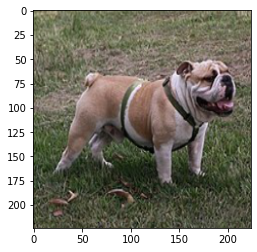

In [0]:
urllib.request.urlretrieve(url, 'a.jpg')
image = plt.imread("a.jpg")
image,label = format_image(image)
plt.imshow(image)
image = np.array(image)
image = np.expand_dims(image, 0)

## .h5 Model

### Load Model as .h5 file

In [0]:
rel_model = tf.keras.models.load_model(
  "/content/1584588522.h5",
  custom_objects={'KerasLayer': hub.KerasLayer})
rel_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 120)               153720    
Total params: 2,411,704
Trainable params: 153,720
Non-trainable params: 2,257,984
_________________________________________________________________


### Predict for a single image using .h5 model

french_bulldog


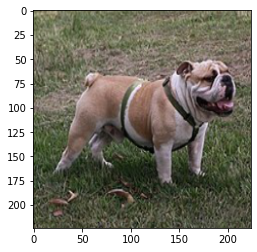

In [0]:
a = rel_model.predict(image)
predicted = tf.squeeze(a).numpy()
predicted_ids = np.argmax(predicted, axis=-1)
predicted_class_names = classes[predicted_ids]
plt.imshow(image[0])
print(predicted_class_names[10:])

### Predict for a batch of images using .h5 model

In [0]:
image_batch, label_batch = next(iter(train_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = rel_model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = classes[predicted_ids]
predicted_class_names

array(['n02115641-dingo', 'n02100236-german_short-haired_pointer',
       'n02098105-soft-coated_wheaten_terrier', 'n02096051-airedale',
       'n02101556-clumber', 'n02106550-rottweiler', 'n02085620-chihuahua',
       'n02089867-walker_hound', 'n02090379-redbone',
       'n02112018-pomeranian', 'n02089867-walker_hound',
       'n02110063-malamute', 'n02099849-chesapeake_bay_retriever',
       'n02091244-ibizan_hound', 'n02086646-blenheim_spaniel',
       'n02088466-bloodhound', 'n02113799-standard_poodle',
       'n02110185-siberian_husky', 'n02111500-great_pyrenees',
       'n02105641-old_english_sheepdog', 'n02113186-cardigan',
       'n02112350-keeshond', 'n02101556-clumber',
       'n02089973-english_foxhound', 'n02094258-norwich_terrier',
       'n02110627-affenpinscher', 'n02096437-dandie_dinmont',
       'n02091831-saluki', 'n02111889-samoyed', 'n02091635-otterhound',
       'n02091635-otterhound', 'n02085620-chihuahua'], dtype='<U40')

In [0]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [117  59  51  40  65  83   0  16  17 107  15  98  58  22   5  12 115  99
 105  78 112 109  65  16  35 100  43  25 106  24  24   0]
Predicted labels:  [117  59  51  40  65  83   0  15  17 107  15  98  58  22   5  12 115  99
 105  78 112 109  65  16  35 100  43  25 106  24  24   0]


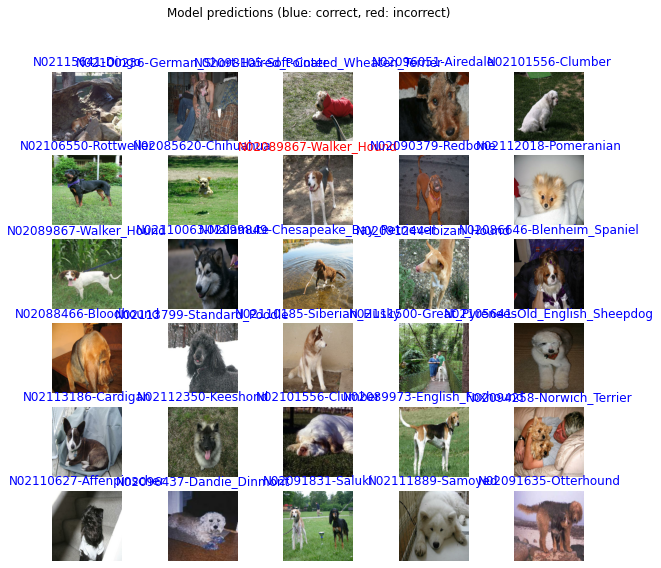

In [0]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

## Model as a Directory

### Load Model as a Directory

In [0]:
rel_as_model = tf.saved_model.load("./model")

### Predict using Model loaded as folder

pug


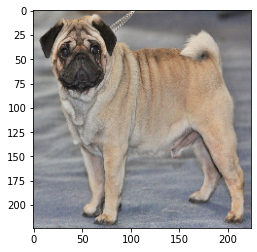

In [0]:
plt.imshow(image[0])
print(classes[np.argmax(rel_as_model(image, training=False).numpy())][10:])